In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [10]:
dir = "p_date=2023-01-03-09_25_13"

In [18]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

18001 records
dict_keys(['loss', 'mae', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [19]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [13]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

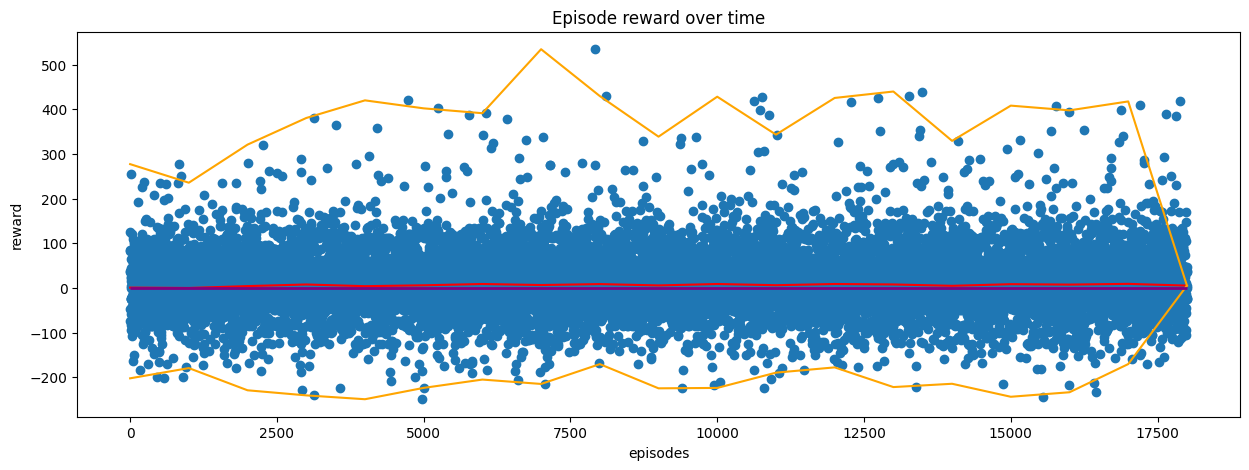

Maximum: 534.5999999999999
Average: 6.36287428476202

Values: 0.8 > -0.0 > 4.2 > 7.8 > 4.0 > 6.0 > 8.9 > 6.6 > 8.7 > 5.7 > 8.9 > 6.2 > 8.9 > 7.9 > 4.8 > 8.5 > 7.6 > 9.2 > 5.3

Minimum (last 1000): -249.10000000000002
Average (last 1000): 6.187706605493794
Maximum (last 1000): 534.5999999999999


In [20]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

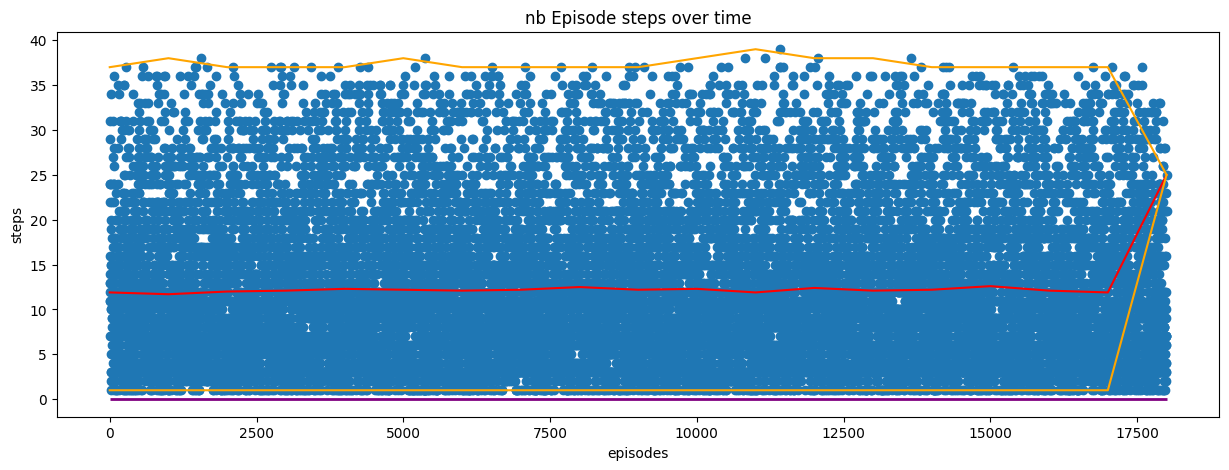

Maximum: 39
Average: 12.1446030776068

Values: 11.9 > 11.7 > 12.0 > 12.1 > 12.3 > 12.2 > 12.1 > 12.2 > 12.5 > 12.2 > 12.3 > 11.9 > 12.4 > 12.1 > 12.2 > 12.6 > 12.1 > 11.9 > 25

Minimum (last 1000): 1
Average (last 1000): 12.156931945179695
Maximum (last 1000): 39


In [21]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

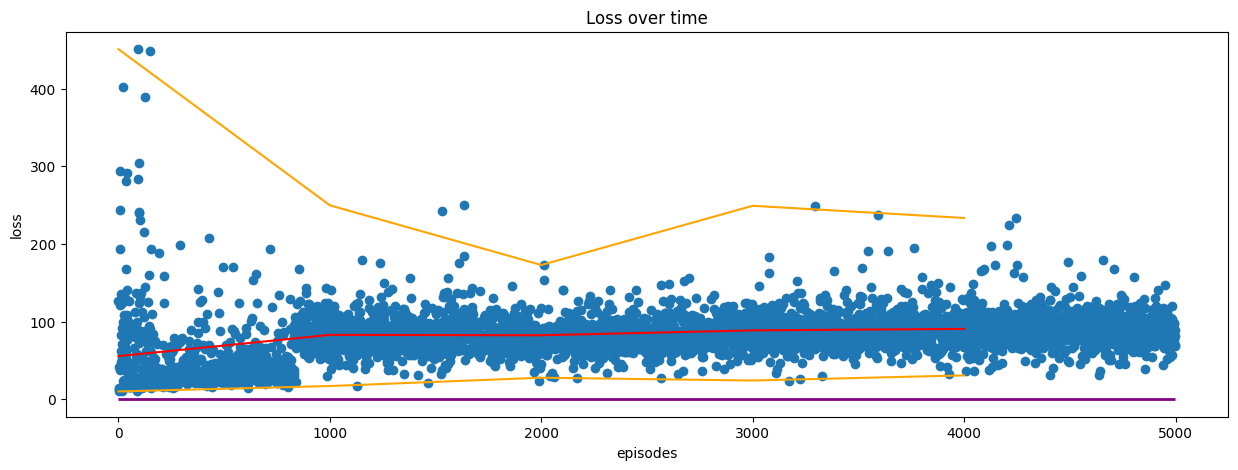

Maximum: 450.8746643066406
Average: 80.02395239817301

Values: 55.5 > 82.9 > 82.4 > 88.7 > 90.6

Minimum (last 1000): 9.956098556518555
Average (last 1000): 77.37146239789327
Maximum (last 1000): 450.8746643066406


In [16]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

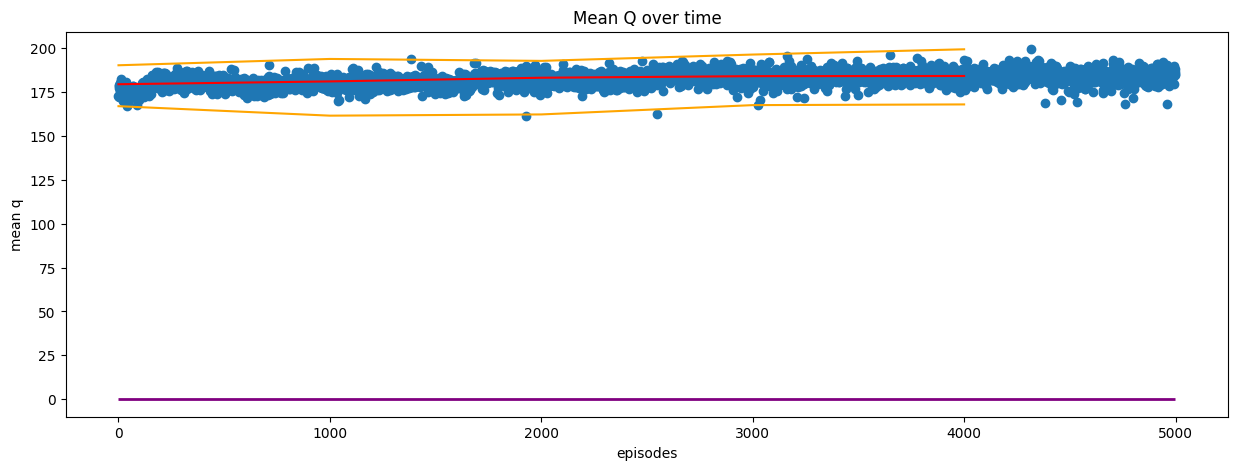

Maximum: 199.33840942382812
Average: 182.31459493103029

Values: 179.4 > 181.0 > 183.1 > 184.0 > 184.1

Minimum (last 1000): 161.45669555664062
Average (last 1000): 181.88044933700562
Maximum (last 1000): 196.31915283203125


In [17]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

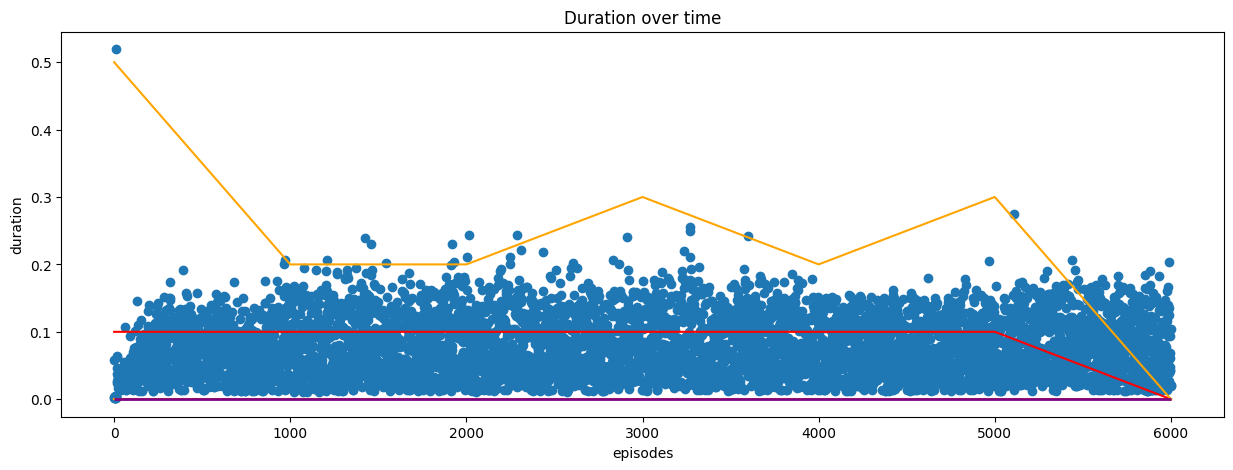

Maximum: 0.5192141000000001
Average: 0.0766371863856024

Values: 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.0

Minimum (last 1000): 0.0012232999999994831
Average (last 1000): 0.07646610993801223
Maximum (last 1000): 0.5192141000000001


In [ ]:
plot(duration, "Duration over time", "episodes", "duration")